# Aperture correction of SpARCS data

The aim of this notebook is to determine the parameters for the aperture correction of SpARCS data:

- Which is the “target” aperture to use to correct the 8th aperture (11×0.186=2.046 arcsec).
- When selecting stars to compute aperture correction, what magnitude range should be use.

## Target aperture

To determine the target aperture, we simulate a curve of growth using the provided apertures and draw two figures:

- The evolution of the magnitudes of the objects by plotting on the same plot aperture number vs the mean magnitude.
- The mean gain (loss when negative) of magnitude is each aperture compared to the previous (except for the first of course).

As target aperture, we should use the smallest (i.e. less noisy) aperture for which most of the flux is captures.

## Magnitude range

To know what limits in aperture to use when doing the aperture correction, we plot for each magnitude bin the correction that is computed and its RMS. We should then use the wide limits (to use more stars) where the correction is stable and with few dispersion.

In [1]:
%pylab inline
from astropy.table import Table
import matplotlib.pyplot as plt
from herschelhelp_internal.utils import aperture_correction

Populating the interactive namespace from numpy and matplotlib


In [2]:
t = Table.read("data/SpARCS_HELP_ELAIS-N1.fits")
stellarity = t['CLASS_STAR']

mags_r = np.array(t['MAG_APER_r']).T
mags_r[mags_r == 99] = np.nan

mags_u = np.array(t['MAG_APER_u']).T
mags_u[mags_u == 99] = np.nan

mags_g = np.array(t['MAG_APER_g']).T
mags_g[mags_g == 99] = np.nan

mags_z = np.array(t['MAG_APER_z']).T
mags_z[mags_z == 99] = np.nan

In [3]:
def plot_mag_app_evol(magnitudes):
    mag_star = magnitudes[:, stellarity > 0.9].copy()

    mag_star_diff = mag_star[1:, :] - mag_star[:-1, :]
        
    plt.rc('figure', figsize=(12, 18))
    fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0})

    ax1.plot(np.nanmean(mag_star, axis=1))
    
    ax2.plot(1+np.arange(len(mag_star_diff)),
             np.nanmean(mag_star_diff, axis=1))
    ax2.axhline(0, c='black', linewidth=.5)

    ax2.set_xlabel("Aperture number")
    ax1.set_ylabel("Mean magnitude")
    ax2.set_ylabel("Mean magnitude gain vs prev. ap.")

In [4]:
def plot_mag_vs_apcor(magnitudes, target_mag):
    mag_ref = np.array(magnitudes[6])
    mag_target = np.array(magnitudes[target_mag])
    
    mag_min = np.floor(np.nanmin(mag_ref))
    mag_max = np.ceil(np.nanmax(mag_ref))
    
    mag_bins = np.arange(mag_min, mag_max)
    
    mag_cor = []
    mag_std = []
    
    for mag_bin_min in mag_bins:
        try:
            mag_diff, _, std = aperture_correction(mag_ref, mag_target, stellarity, mag_bin_min, mag_bin_min + 1)
        except:
            mag_diff, std = np.nan, np.nan
        mag_cor.append(mag_diff)
        mag_std.append(std)
    
    mag_cor = np.array(mag_cor)
    mag_std = np.array(mag_std)
    
    plt.rc('figure', figsize=(12, 7))
    plt.plot(mag_bins, mag_cor, color='black')
    plt.fill_between(mag_bins, mag_cor - mag_std, mag_cor + mag_std, alpha=.3)

## r band

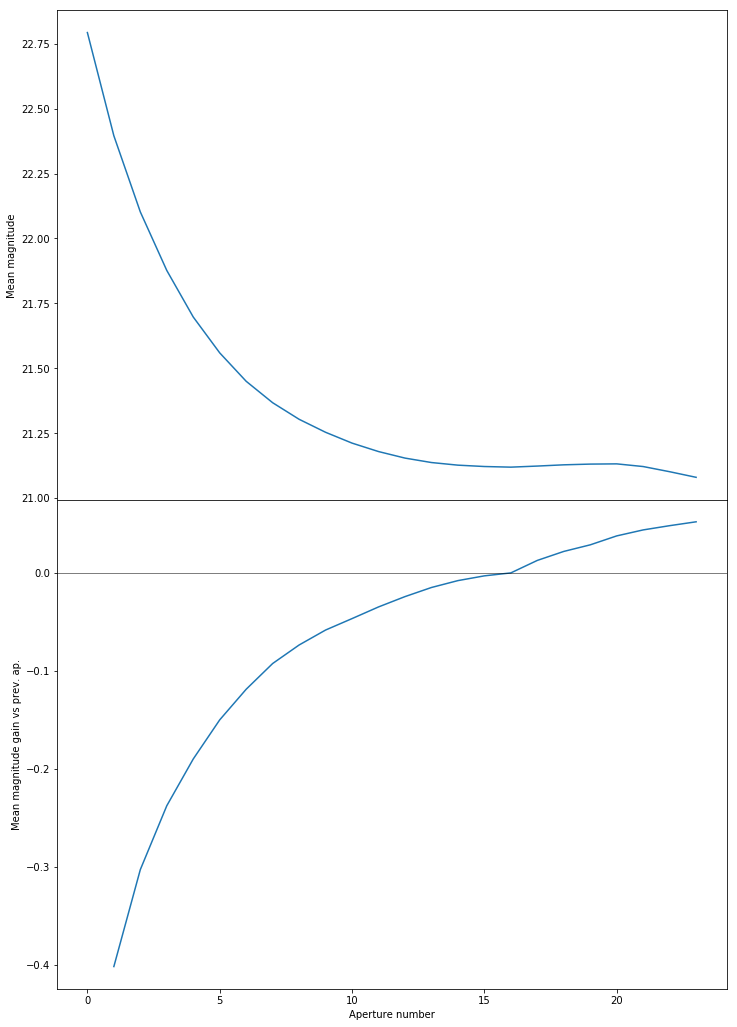

In [5]:
plot_mag_app_evol(mags_r)

We will use the 16th (aperture number above begin to 0) aperture as target.

/home/yroehlly/herschelhelp_internal/herschelhelp_internal/utils.py:131: RuntimeWarning: invalid value encountered in greater_equal
  mask &= (mag_ref >= mag_min)
/home/yroehlly/herschelhelp_internal/herschelhelp_internal/utils.py:133: RuntimeWarning: invalid value encountered in less_equal
  mask &= (mag_ref <= mag_max)


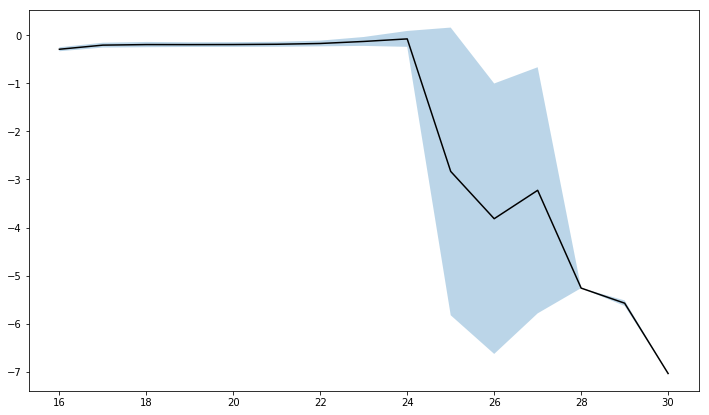

In [6]:
plot_mag_vs_apcor(mags_r, 15)

We use magnitudes between 16 and 23.

## u band

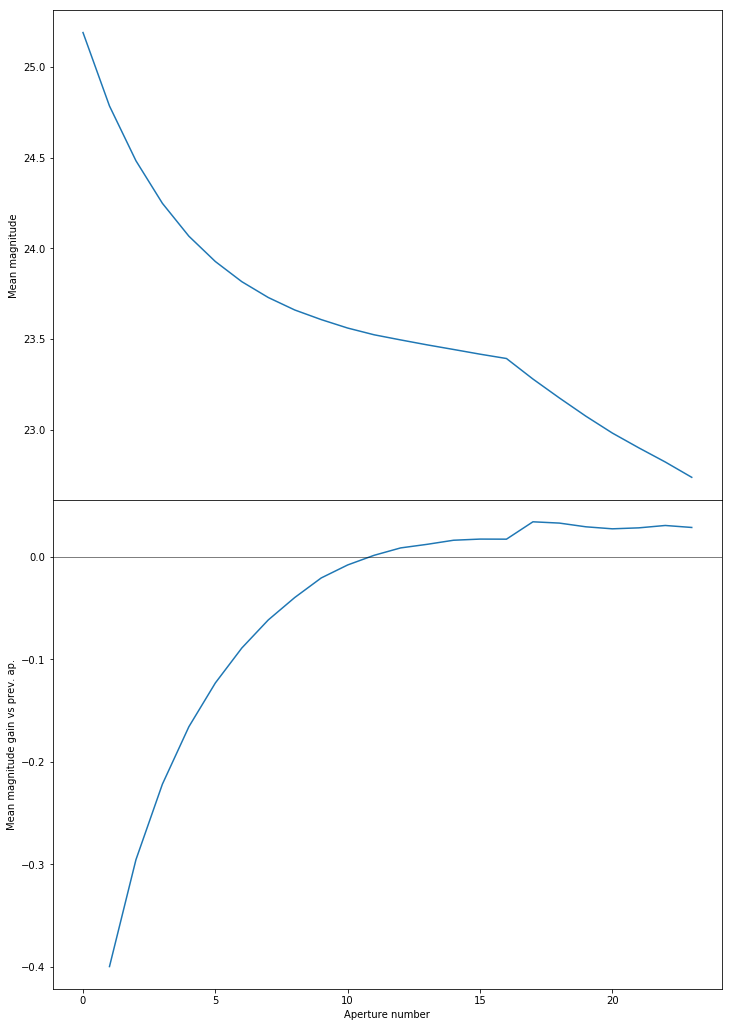

In [7]:
plot_mag_app_evol(mags_u)

We will use the 16th (aperture number above begin to 0) aperture as target. Should be use the 12nd because of the increasing magnitude?

/home/yroehlly/herschelhelp_internal/herschelhelp_internal/utils.py:131: RuntimeWarning: invalid value encountered in greater_equal
  mask &= (mag_ref >= mag_min)
/home/yroehlly/herschelhelp_internal/herschelhelp_internal/utils.py:133: RuntimeWarning: invalid value encountered in less_equal
  mask &= (mag_ref <= mag_max)


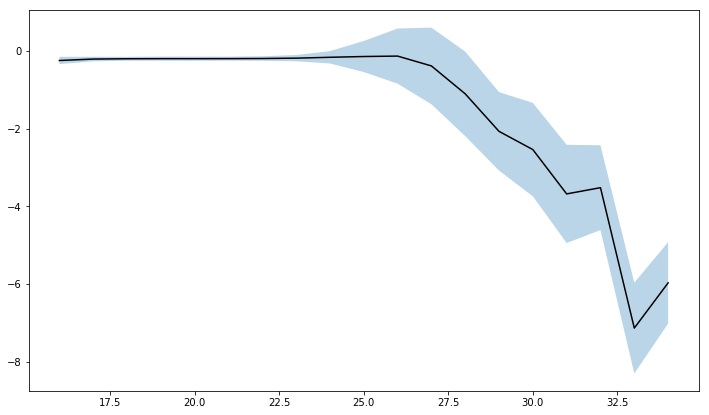

In [8]:
plot_mag_vs_apcor(mags_u, 15)

We use magnitudes between 17 and 22.

## g band

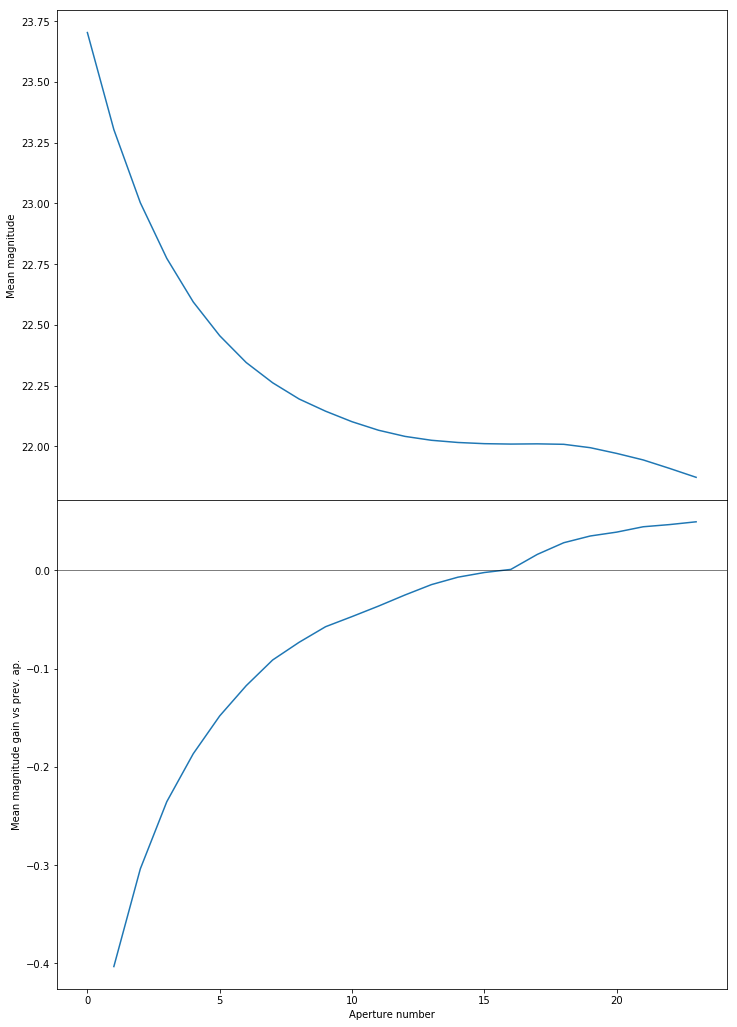

In [9]:
plot_mag_app_evol(mags_g)

We will use the 16th (aperture number above begin to 0) aperture as target.

/home/yroehlly/herschelhelp_internal/herschelhelp_internal/utils.py:131: RuntimeWarning: invalid value encountered in greater_equal
  mask &= (mag_ref >= mag_min)
/home/yroehlly/herschelhelp_internal/herschelhelp_internal/utils.py:133: RuntimeWarning: invalid value encountered in less_equal
  mask &= (mag_ref <= mag_max)


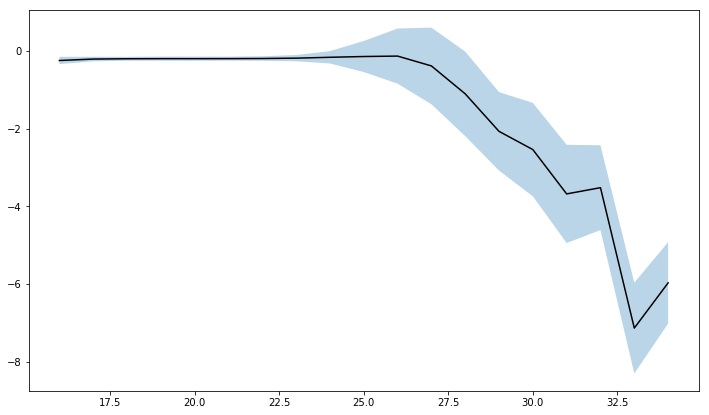

In [10]:
plot_mag_vs_apcor(mags_u, 15)

We use magnitudes between 17 and 23.

## z band

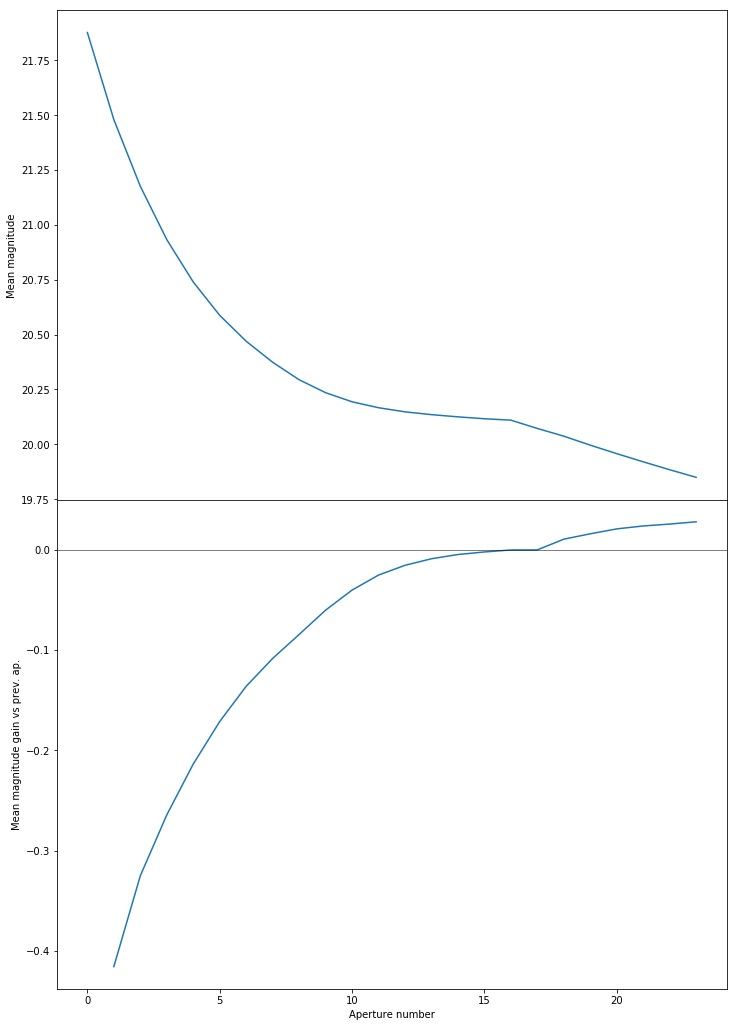

In [11]:
plot_mag_app_evol(mags_z)

We will use the 16th (aperture number above begin to 0) aperture as target.

/home/yroehlly/herschelhelp_internal/herschelhelp_internal/utils.py:131: RuntimeWarning: invalid value encountered in greater_equal
  mask &= (mag_ref >= mag_min)
/home/yroehlly/herschelhelp_internal/herschelhelp_internal/utils.py:133: RuntimeWarning: invalid value encountered in less_equal
  mask &= (mag_ref <= mag_max)


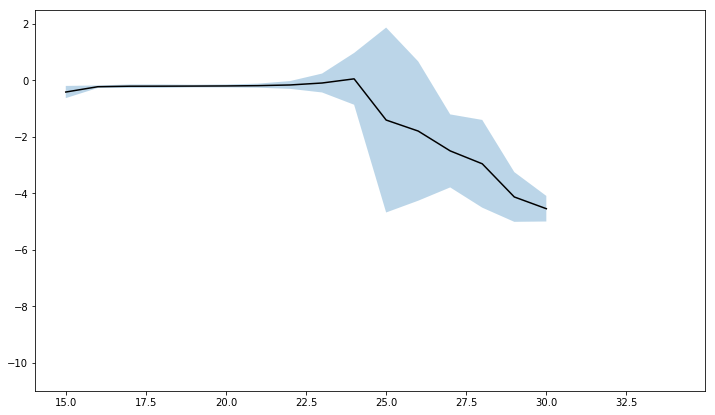

In [12]:
plot_mag_vs_apcor(mags_z, 15)

We use magnitudes between 16 and 22.